In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df, load_big_df
from utils import two_sig_signal, two_sig_signal_multi, get_yulu_df, nice_hist_series, plot_box_plot
from utils import plot_box_plot_a, get_future_df

from lin_regr_utils import lin_regr, linearity_test, residual_independence_test, homoscedasticity_test, residual_normality_test
from lin_regr_utils import multicollinearity_test, get_stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_raw = pd.read_csv("../simulation_data/output_2025-04-12_20250411_GALAUSDTOB500_GALAUSDTtrades_AA.csv")
df_raw


,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price
0,1.744330e+09,0.01388,0.01389,1005955.0,2102341.0,NaN,NaN,NaN
1,1.744330e+09,0.01388,0.01389,107750.0,2102341.0,NaN,NaN,NaN
2,1.744330e+09,0.01388,0.01389,27581.0,2102341.0,NaN,NaN,NaN
3,1.744330e+09,0.01388,0.01389,70534.0,2102341.0,NaN,NaN,NaN
4,1.744330e+09,0.01388,0.01389,37707.0,2102341.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
641901,1.744416e+09,0.01427,0.01428,441908.0,6357962.0,NaN,NaN,NaN
641902,1.744416e+09,0.01427,0.01428,441908.0,6357962.0,NaN,NaN,NaN
641903,1.744416e+09,0.01427,0.01428,441908.0,6322936.0,NaN,NaN,NaN
641904,1.744416e+09,0.01427,0.01428,432991.0,6322936.0,NaN,NaN,NaN


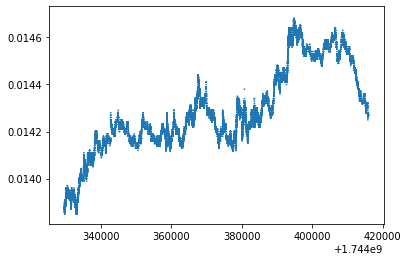

In [4]:
plt.plot(df_raw['time'], df_raw['bbid'])

In [18]:
%reload_ext autoreload
df = get_future_df(df_raw, '1S')
df

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,round_time,r_time,future_1m_mid,future_1m_return,future_1m_std,future_1m_range,past_1m_return
0,2025-04-11 00:00:00.206000128,0.01388,0.01389,1005955.0,2102341.0,NaN,NaN,NaN,2025-04-11 00:00:00,2025-04-11 00:00:00,0.013885,0.00000,NaN,NaN,NaN
1,2025-04-11 00:00:00.207000064,0.01388,0.01389,107750.0,2102341.0,NaN,NaN,NaN,2025-04-11 00:00:00,2025-04-11 00:00:00,0.013885,0.00000,NaN,NaN,NaN
2,2025-04-11 00:00:00.303000064,0.01388,0.01389,27581.0,2102341.0,NaN,NaN,NaN,2025-04-11 00:00:00,2025-04-11 00:00:00,0.013885,0.00000,NaN,NaN,NaN
3,2025-04-11 00:00:00.403000064,0.01388,0.01389,70534.0,2102341.0,NaN,NaN,NaN,2025-04-11 00:00:00,2025-04-11 00:00:00,0.013885,0.00000,NaN,NaN,NaN
4,2025-04-11 00:00:00.503000064,0.01388,0.01389,37707.0,2102341.0,NaN,NaN,NaN,2025-04-11 00:00:01,2025-04-11 00:00:01,0.013875,-0.00072,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641901,2025-04-11 23:59:59.602999808,0.01427,0.01428,441908.0,6357962.0,NaN,NaN,NaN,2025-04-12 00:00:00,2025-04-12 00:00:00,NaN,NaN,NaN,NaN,-0.0007
641902,2025-04-11 23:59:59.804000000,0.01427,0.01428,441908.0,6357962.0,NaN,NaN,NaN,2025-04-12 00:00:00,2025-04-12 00:00:00,NaN,NaN,NaN,NaN,-0.0007
641903,2025-04-12 00:00:00.004000000,0.01427,0.01428,441908.0,6322936.0,NaN,NaN,NaN,2025-04-12 00:00:00,2025-04-12 00:00:00,NaN,NaN,NaN,NaN,-0.0007
641904,2025-04-12 00:00:00.104000000,0.01427,0.01428,432991.0,6322936.0,NaN,NaN,NaN,2025-04-12 00:00:00,2025-04-12 00:00:00,NaN,NaN,NaN,NaN,-0.0007


(array([3.24630e+04, 0.00000e+00, 2.13505e+05, 0.00000e+00, 1.90000e+01,
        1.93863e+05, 0.00000e+00, 4.07000e+02, 8.07030e+04, 0.00000e+00,
        3.01000e+02, 2.66090e+04, 2.20000e+01, 0.00000e+00, 8.87300e+03,
        0.00000e+00, 0.00000e+00, 7.45100e+03, 0.00000e+00, 1.33300e+03,
        9.61000e+02, 0.00000e+00, 2.48100e+03, 0.00000e+00, 0.00000e+00,
        7.24000e+02, 0.00000e+00, 0.00000e+00, 1.48000e+02, 0.00000e+00,
        0.00000e+00, 8.45000e+02, 0.00000e+00, 0.00000e+00, 5.20000e+02,
        0.00000e+00, 0.00000e+00, 8.74000e+02, 0.00000e+00, 3.94000e+02]),
 array([ 0.  ,  0.35,  0.7 ,  1.05,  1.4 ,  1.75,  2.1 ,  2.45,  2.8 ,
         3.15,  3.5 ,  3.85,  4.2 ,  4.55,  4.9 ,  5.25,  5.6 ,  5.95,
         6.3 ,  6.65,  7.  ,  7.35,  7.7 ,  8.05,  8.4 ,  8.75,  9.1 ,
         9.45,  9.8 , 10.15, 10.5 , 10.85, 11.2 , 11.55, 11.9 , 12.25,
        12.6 , 12.95, 13.3 , 13.65, 14.  ]),
 <BarContainer object of 40 artists>)

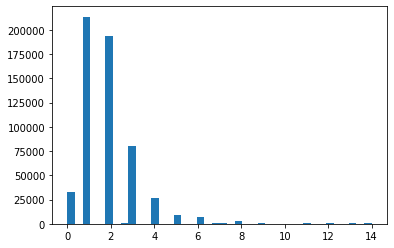

In [23]:
plt.hist(df['future_1m_range'] * 100000, bins=40)